<a href="https://colab.research.google.com/github/nanoCHI/Data-Analysis/blob/main/Call_Volume_Trend_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing all the important libraries

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Read CSV file

In [50]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Call_Volume_Trend_Analysis_Project_9.xlsx - Call_Data.csv')
df

,Agent_Name,Agent_ID,Customer_Phone_No,Queue_Time(Secs),Date_&_Time,Time,Time_Bucket,Duration(hh:mm:ss),Call_Seconds (s),Call_Status,Wrapped _By,Ringing,IVR _Duration
0,Executives 42,1000042.0,98502XXXXX,2,1/1/2022,9.0,9_10,0:01:36,96.0,answered,Agent,YES,0:00:16
1,Executives 4,1000004.0,80595XXXXX,0,1/1/2022,9.0,9_10,0:02:20,140.0,answered,Agent,YES,0:00:26
2,Executives 65,1000065.0,70202XXXXX,0,1/1/2022,9.0,9_10,0:01:25,85.0,answered,AutoWrapped,YES,0:00:16
3,Executives 55,1000055.0,96104XXXXX,1,1/1/2022,9.0,9_10,0:01:31,91.0,answered,Agent,YES,0:00:25
4,Executives 21,1000021.0,82001XXXXX,0,1/1/2022,9.0,9_10,0:02:45,165.0,answered,Agent,YES,0:00:23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117983,Executives 7,1000007.0,85399XXXXX,62,1/23/2022,20.0,20_21,0:01:32,92.0,answered,Agent,YES,0:00:42
117984,Executives 36,1000036.0,88397XXXXX,22,1/23/2022,20.0,20_21,0:01:14,74.0,answered,Agent,YES,0:00:15
117985,Executives 48,1000048.0,70035XXXXX,14,1/23/2022,20.0,20_21,0:01:48,108.0,answered,Agent,YES,0:00:23
117986,Executives 33,1000033.0,87773XXXXX,26,1/23/2022,20.0,20_21,0:01:13,73.0,answered,Agent,YES,0:01:05


# Cleaning The DataFrame
1. Checking For Duplicate Values
2. Checking for irrelevant columns
3. Checking for null values

In [51]:
df.duplicated().sum()

941

> So there are 941 Duplicate Values
>> Next step is to remove those rows from the dataframe

In [52]:
df = df.drop_duplicates()

# Re-checking
if(df.duplicated().sum()==0):
  print("No more duplicate values")
else:
  print("More duplicates values found")

No more duplicate values





> checking for any irrelevant columns
















In [53]:
df.keys()

Index(['Agent_Name', 'Agent_ID', 'Customer_Phone_No', 'Queue_Time(Secs)',
       'Date_&_Time', 'Time', 'Time_Bucket', 'Duration(hh:mm:ss)',
       'Call_Seconds (s)', 'Call_Status', 'Wrapped _By', 'Ringing',
       'IVR _Duration'],
      dtype='object')

> It seems there are no irrelevant columns

> Checking for null values

In [54]:
df.isnull().sum()

Agent_Name            33257
Agent_ID              33257
Customer_Phone_No         0
Queue_Time(Secs)          0
Date_&_Time               0
Time                      0
Time_Bucket               0
Duration(hh:mm:ss)        0
Call_Seconds (s)          0
Call_Status               0
Wrapped _By           46936
Ringing                   0
IVR _Duration             0
dtype: int64



> Dropping rows with null values






In [55]:
df.dropna()

,Agent_Name,Agent_ID,Customer_Phone_No,Queue_Time(Secs),Date_&_Time,Time,Time_Bucket,Duration(hh:mm:ss),Call_Seconds (s),Call_Status,Wrapped _By,Ringing,IVR _Duration
0,Executives 42,1000042.0,98502XXXXX,2,1/1/2022,9.0,9_10,0:01:36,96.0,answered,Agent,YES,0:00:16
1,Executives 4,1000004.0,80595XXXXX,0,1/1/2022,9.0,9_10,0:02:20,140.0,answered,Agent,YES,0:00:26
2,Executives 65,1000065.0,70202XXXXX,0,1/1/2022,9.0,9_10,0:01:25,85.0,answered,AutoWrapped,YES,0:00:16
3,Executives 55,1000055.0,96104XXXXX,1,1/1/2022,9.0,9_10,0:01:31,91.0,answered,Agent,YES,0:00:25
4,Executives 21,1000021.0,82001XXXXX,0,1/1/2022,9.0,9_10,0:02:45,165.0,answered,Agent,YES,0:00:23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117983,Executives 7,1000007.0,85399XXXXX,62,1/23/2022,20.0,20_21,0:01:32,92.0,answered,Agent,YES,0:00:42
117984,Executives 36,1000036.0,88397XXXXX,22,1/23/2022,20.0,20_21,0:01:14,74.0,answered,Agent,YES,0:00:15
117985,Executives 48,1000048.0,70035XXXXX,14,1/23/2022,20.0,20_21,0:01:48,108.0,answered,Agent,YES,0:00:23
117986,Executives 33,1000033.0,87773XXXXX,26,1/23/2022,20.0,20_21,0:01:13,73.0,answered,Agent,YES,0:01:05


> After cleaning the dataframe we ended up with 70111 rows × 13 columns and ready to be analysed


# Analysis

1. Calculate the average call time duration for all incoming calls received by agents (in each Time_Bucket).

In [56]:
average_duration = df.groupby("Time_Bucket")["Call_Seconds (s)"].agg(np.average)
average_duration


Time_Bucket
10_11     99.151900
11_12    118.255262
12_13    145.761901
13_14    150.530518
14_15    147.696546
15_16    170.231375
16_17    181.501309
17_18    179.808792
18_19    174.396959
19_20    145.008845
20_21    106.920257
9_10      94.090764
Name: Call_Seconds (s), dtype: float64

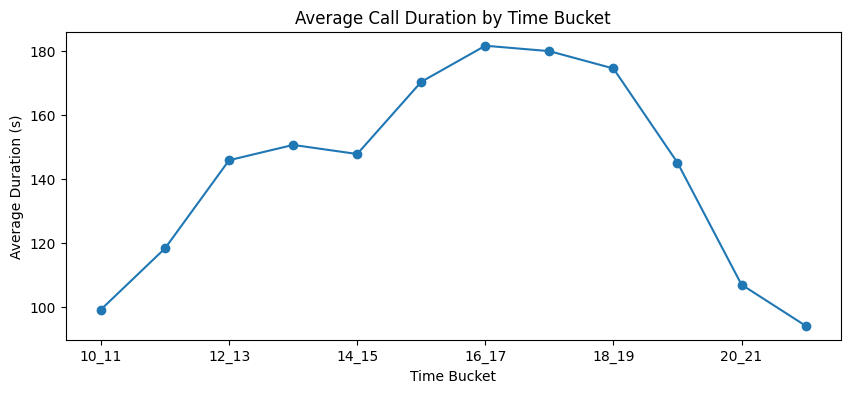

In [57]:
# Plot the average duration
average_duration.plot(kind="line", marker='o', figsize=(10, 4))

# Set the plot title and labels
plt.title("Average Call Duration by Time Bucket")
plt.xlabel("Time Bucket")
plt.ylabel("Average Duration (s)")

# Display the plot
plt.show()



> 4PM to 5PM had the highest of average of calls answered



2. Showing the total volume/ number of calls coming

In [65]:
total_calls = df.groupby("Time_Bucket").size()
total_calls

Time_Bucket
10_11    13081
11_12    14444
12_13    12562
13_14    11485
14_15    10509
15_16     9141
16_17     8785
17_18     8530
18_19     7235
19_20     6444
20_21     5455
9_10      9376
dtype: int64

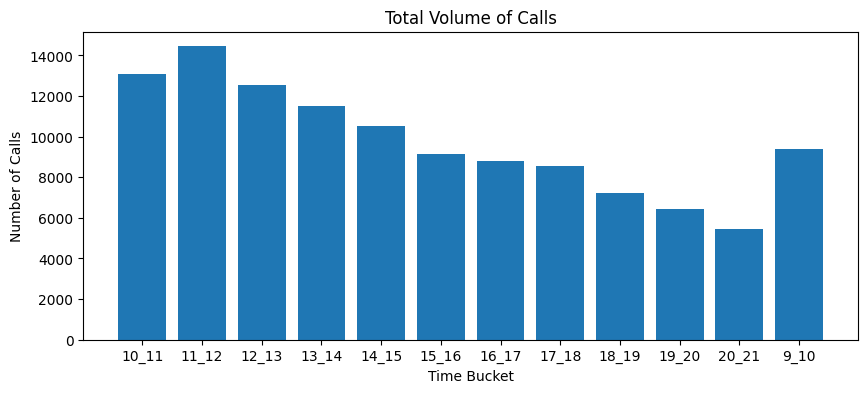

In [66]:
# Plotting a bar chart
plt.figure(figsize=(10, 4))
plt.bar(total_calls.index, total_calls)
plt.xlabel("Time Bucket")
plt.ylabel("Number of Calls")
plt.title("Total Volume of Calls")
plt.show()

> 11AM to 12PM has the highest number of call recieved

3. Calculate the required number of agents.

In [73]:
answered_calls = df[df["Call_Status"] == "Answered"]
current_abandon_rate = 1 - (answered_calls.shape[0] / df.shape[0])

# Assuming the target abandon rate is 10%
target_abandon_rate = 0.1

# Calculate the required number of agents per time bucket
required_agents = (total_calls * target_abandon_rate) / (1 - target_abandon_rate)

# Print the required number of agents per time bucket
print(required_agents)

Time_Bucket
10_11    1453.444444
11_12    1604.888889
12_13    1395.777778
13_14    1276.111111
14_15    1167.666667
15_16    1015.666667
16_17     976.111111
17_18     947.777778
18_19     803.888889
19_20     716.000000
20_21     606.111111
9_10     1041.777778
dtype: float64


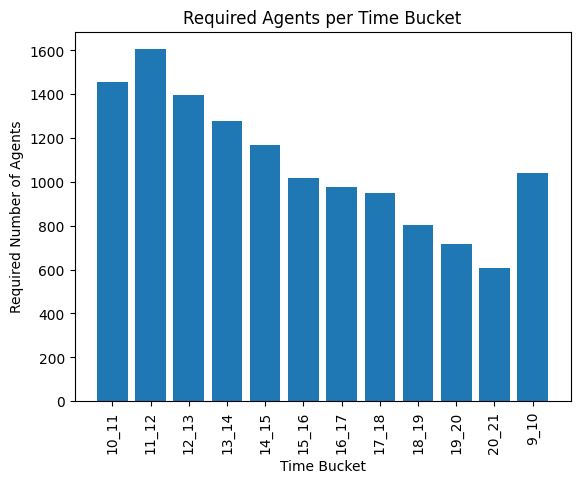

In [75]:
plt.bar(required_agents.index, required_agents)
plt.xlabel("Time Bucket")
plt.ylabel("Required Number of Agents")
plt.title("Required Agents per Time Bucket")
plt.xticks(rotation=90)
plt.show()